In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [2]:
def linearna (x, k, n):
    return k*x + n

In [4]:
igla = np.loadtxt('igla.txt')

x_i = igla[:, 0] * 1e-3
F_i = igla[:, 1] * 1e-3 * 9.81

x_i, F_i

(array([0.00099, 0.00202, 0.0031 , 0.00403, 0.0052 , 0.00602, 0.00713,
        0.0081 , 0.00926]),
 array([0.79461, 0.81423, 0.83385, 0.77499, 0.90252, 0.81423, 1.02024,
        1.06929, 1.14777]))

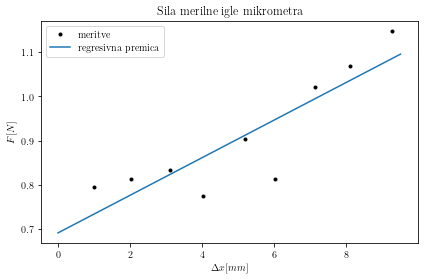

In [14]:
par, cov = curve_fit(linearna, x_i, F_i)

k_i, F_gi = par

dk_i, dF_gi = np.sqrt(np.diag(cov))

fig, ax = plt.subplots()

ax.scatter(x_i * 1e3, F_i, marker='.', color='k', label='meritve')

x_lin_i = np.linspace(0, 9.5)

ax.plot(x_lin_i, linearna(x_lin_i * 1e-3, *par), label='regresivna premica')

ax.set_title('Sila merilne igle mikrometra')
ax.set_xlabel(r'$\Delta x [mm]$')
ax.set_ylabel(r'$F [N]$')
ax.legend()
fig.tight_layout()
fig.savefig('igla.pdf')

k_i, dk_i

k_i = unp.uarray([k_i], [dk_i])


In [54]:
kvader = np.loadtxt('kvader.txt')

d_k = unp.uarray(kvader[:, 1], 17*[0.01]) * 1e-3
F_k = unp.uarray(kvader[:, 0], 17 * [0.1]) * 1e-3 * 9.81 + k_i * d_k

a_k = unp.uarray([7e-3], [0.02e-3])
l_k = unp.uarray([56e-2], [0.02e-2])
m_k = unp.uarray([267e-3], [2e-3])

J_k = a_k ** 4 / 12
rho_k = m_k / (a_k ** 2 * l_k)

par_k, cov_k = curve_fit(linearna, unp.nominal_values(F_k), unp.nominal_values(d_k), sigma = (unp.std_devs(d_k) + unp.std_devs(F_k)))

k_k, n_k = par_k
dk_k, dn_k = np.sqrt(np.diag(cov_k))

k_k = unp.uarray([k_k], [dk_k])

E_k = (l_k ** 3) / (48 * J_k * k_k)

F_max_k = 8 * E_k * J_k * 0.1e-2 / (a_k * l_k)

u_k = (9.81 * m_k) * l_k ** 3 / (48 * E_k * J_k )

k_k, J_k, E_k * 1e-9, F_max_k, u_k * 1e3, rho_k


(array([0.0001698648569673467+/-3.1449778107348906e-06], dtype=object),
 array([2.0008333333333337e-10+/-2.2866666666666668e-12], dtype=object),
 array([107.64860143631341+/-2.3450356894150155], dtype=object),
 array([43.9565122531613+/-0.8240684708303734], dtype=object),
 array([0.44492192390886226+/-0.008886190248017144], dtype=object),
 array([9730.320699708454+/-91.73904594744717], dtype=object))

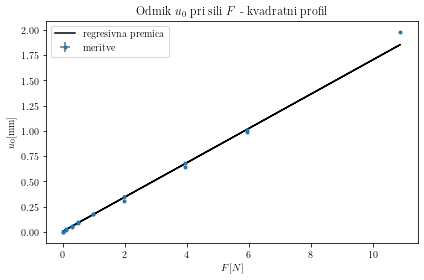

In [55]:
fig, ax = plt.subplots()

ax.errorbar(unp.nominal_values(F_k), unp.nominal_values(d_k)*1e3, yerr=unp.std_devs(d_k) * 1e3, xerr=unp.std_devs(F_k), fmt='.', ecolor='dimgray', label='meritve')

ax.plot(unp.nominal_values(F_k), linearna(unp.nominal_values(F_k), *par_k) * 1e3, color='k', label='regresivna premica')

ax.set_title('Odmik $u_0$ pri sili $F$ - kvadratni profil')
ax.set_xlabel(r'$F [N]$')
ax.set_ylabel(r'$u_0$[mm]')
ax.legend()
fig.tight_layout()
fig.savefig('kvader.pdf')

In [66]:
valj = np.loadtxt('valj.txt')

mu_v = unp.uarray(valj[:, 1], 17*[0.01]) * 1e-3
F_v = unp.uarray(valj[:, 0], 17 * [0.1]) * 1e-3 * 9.81 + k_i * mu_v

d_v = unp.uarray([7e-3], [0.02e-3])
l_v = unp.uarray([56e-2], [0.02e-2])
m_v = unp.uarray([214e-3], [2e-3])

J_v = np.pi * (d_v / 2) ** 4 / 4
rho_v = m_v / (np.pi * (d_v / 2) ** 2 * l_v)

par_v, cov_v= curve_fit(linearna, unp.nominal_values(F_v), unp.nominal_values(mu_v), sigma=(unp.std_devs(mu_v) + unp.std_devs(F_v)))

k_v, n_v = par_v
dk_v, dn_v = np.sqrt(np.diag(cov_v))

k_v = unp.uarray([k_v], [dk_v])

E_v = (l_v ** 3) / (48 * J_v * k_v)

F_max_v = 8 * E_v * J_v * 0.1e-2 / (d_v * l_v)

u_v = (9.81 * m_v) * l_v ** 3 / (48 * E_v * J_v )

k_v, J_v, E_v * 1e-9, F_max_v, u_v * 1e3, rho_v


(array([0.0+/-0.00106901358850638,
        0.09894953882174104+/-0.0010844115150249526,
        0.2981229246978347+/-0.00134693921649666,
        0.4964467717521873+/-0.0016635942553023836,
        0.9945926211478567+/-0.003103435212520471,
        1.9862118564196198+/-0.005298641732257136,
        3.977945715180556+/-0.011612289639030025,
        5.957361261026247+/-0.01533321963479292,
        10.926076672656826+/-0.02897269930195687,
        5.962458493956693+/-0.01642330266001788,
        3.977096176358815+/-0.011430981024863463,
        1.9942824752261596+/-0.007001667554885221,
        0.9950173905587272+/-0.003189064469841842,
        0.4947476941087052+/-0.0014041891219123237,
        0.3185118564196196+/-0.005298641732257136,
        0.09852476941087053+/-0.0010728837881094785,
        0.0+/-0.00106901358850638], dtype=object),
 array([0.0+/-1e-05, 2e-05+/-1e-05, 8.999999999999999e-05+/-1e-05,
        0.00014000000000000001+/-1e-05, 0.00032+/-1e-05, 0.00057+/-1e-05,
        0.

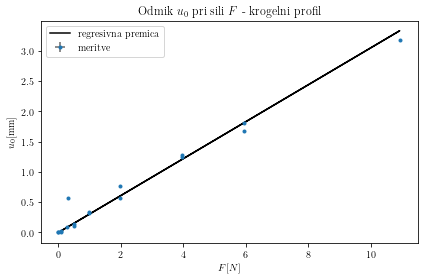

In [67]:
fig, ax = plt.subplots()

ax.errorbar(unp.nominal_values(F_v), unp.nominal_values(mu_v)*1e3, yerr=unp.std_devs(mu_v) * 1e3, xerr=unp.std_devs(F_v), fmt='.', ecolor='dimgray', label='meritve')

ax.plot(unp.nominal_values(F_v), linearna(unp.nominal_values(F_v), *par_v) * 1e3, color='k', label='regresivna premica')

ax.set_title('Odmik $u_0$ pri sili $F$ - krogelni profil')
ax.set_xlabel(r'$F [N]$')
ax.set_ylabel(r'$u_0$[mm]')
ax.legend()
fig.tight_layout()
fig.savefig('valj.pdf')